<a href="https://colab.research.google.com/github/donghyundavidchoi/Data_Analysis/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%95%EC%A0%9C/%EC%99%9C%EB%8F%84%EC%99%80%EC%B2%A8%EB%8F%84_LogSacle%EC%A0%81%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주어진 데이터 중 train.csv에서 'SalePrice'컬럼의 왜도와 첨도를 구한 값과, 'SalePrice'컬럼을 스케일링(log1p)로 변환한 이후 왜도와 첨도를 구해 모두 더한 다음 소수점 2째자리까지 출력하시오.

In [1]:
!gdown --fuzzy https://drive.google.com/file/d/1txRVXp-Eh222PzIeTQ-fuAoUYFR9f7q-/view?usp=sharing
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Downloading...
From: https://drive.google.com/uc?id=1txRVXp-Eh222PzIeTQ-fuAoUYFR9f7q-
To: /content/kaggle.json
100% 73.0/73.0 [00:00<00:00, 74.2kB/s]


In [5]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 71.9MB/s]


In [6]:
!unzip /content/house-prices-advanced-regression-techniques.zip

Archive:  /content/house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [15]:
import pandas as pd
import numpy as np

In [26]:
data = pd.read_csv('/content/train.csv')

In [27]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


---------

# SalePrice의 히스토그램 확인

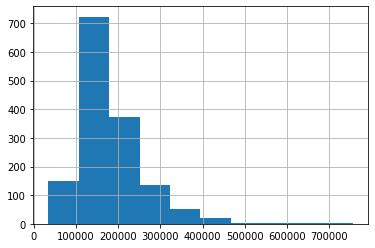

In [28]:
data['SalePrice'].hist()

-----------

# SalePrice의 왜도와 첨도 구하기

In [29]:
skewness = data['SalePrice'].skew()

In [30]:
kurtosis = data['SalePrice'].kurt()

In [31]:
print(skewness)
print(kurtosis)

1.8828757597682129
6.536281860064529


---------

# SalePrice에 Log Scale 적용

### np.log가 아닌 np.log1p를 사용하는 이유
그냥 log를 사용할 경우 값이 0인 데이터가 마이너스 무한대로 수렴하는 경우가 발생. 이를 방지하기 위해 np.log가 아닌 log(x+1)로 변환하는 np.log1p를 사용.

In [32]:
data['SalePrice_log'] = np.log1p(data['SalePrice'])

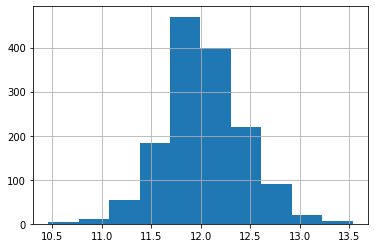

In [33]:
data['SalePrice_log'].hist()

Log Scale 적용 후 한쪽으로 쏠려 있던 히스토그램이 정상화 된 것을 확인

---------

# Log Scale을 적용한 SalePrice에 대해 첨도와 왜도 구하기

In [34]:
skewness_log = data['SalePrice_log'].skew()

In [35]:
kurtosis_log = data['SalePrice_log'].kurt()

In [36]:
print(skewness_log)
print(kurtosis_log)

0.12134661989685333
0.809519155707878


------------

# 구한 모든 값을 더한 후 소수점 둘째자리로 반올림

In [37]:
print(round(skewness + kurtosis + skewness_log + kurtosis_log, 2))

9.35
